In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Метод, который позволит нам узнать, где мы нахожимся в директории
os.getcwd()

'/Users/giorgi/Documents/Jupiter Notebook/Lesson_4/Project'

In [3]:
# Создадим вложенный цикл, чтобы считать все файлы и добавить в созданный даатфрейм
df = pd.DataFrame(columns=['product_id', 'quantity', 'name', 'date'])
for path, dirs, files in os.walk("data", topdown=False):
    for name in files:
        path_to_file = os.path.join(path, name)
        df1 = pd.read_csv(path_to_file)
        df1['name'] = path_to_file.split('/')[2]
        df1['date'] = path_to_file.split('/')[1]
        df = pd.concat([df, df1])

In [4]:
# Количество приобретенного продукта за все время
df.quantity.sum()

480

In [5]:
# Узнаем какой пользователь совершил больше всего покупок
df \
    .groupby('name') \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending=False)

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45
Petr_Fedorov,34
Kirill_Fedorov,28
Rostislav_Petrov,28
Vasiliy_Ivanov,27
Alexey_Fedorov,24
Anton_Ivanov,23


In [6]:
# Найдем топ-10 товаров по числу проданных единиц за всё время
top10_products = df \
    .groupby('product_id') \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending=False) \
    .head(10) \
    .reset_index()
top10_products

,product_id,quantity
0,27,20
1,56,18
2,24,15
3,74,15
4,41,14
5,34,13
6,94,13
7,66,13
8,92,12
9,50,12


<AxesSubplot:xlabel='product_id', ylabel='quantity'>

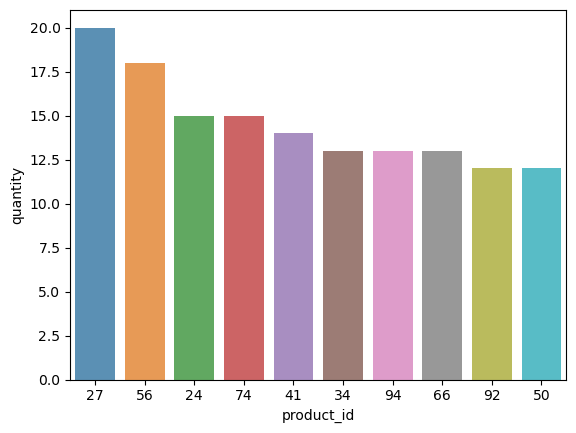

In [7]:
# Построим барплот (sns.barplot) по датафрейму (top10_products)
sns.barplot(data = top10_products, x = 'product_id', y = 'quantity', alpha=0.8, order= top10_products.product_id)

In [8]:
# Создадим датафрейм продаж по дням
sales_by_day = df \
    .groupby('date') \
    .agg({'quantity': 'sum'}) \
    .reset_index() \
    .sort_values('date')
sales_by_day

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


<AxesSubplot:xlabel='date', ylabel='quantity'>

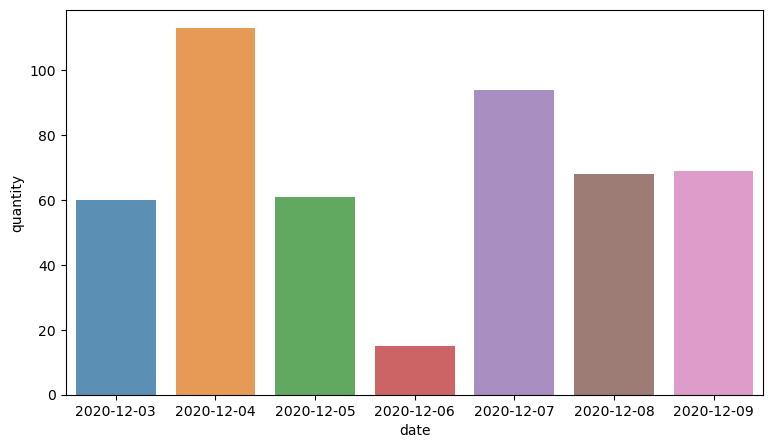

In [9]:
# Построим барплот (sns.barplot) по датафрейму (sales_by_day)
plt.figure(figsize=(9, 5))
sns.barplot(x = sales_by_day.date, y = sales_by_day.quantity, alpha = 0.8)

In [10]:
# Удалим дубликаты по колонкам 'name', 'product_id', 'date'
df_without_duplicates = df.drop_duplicates(subset=['name', 'product_id', 'date'])
df_without_duplicates

,product_id,quantity,name,date,Unnamed: 0
0,56,4,Vasiliy_Fedorov,2020-12-06,0.0
1,97,3,Vasiliy_Fedorov,2020-12-06,1.0
2,79,3,Vasiliy_Fedorov,2020-12-06,2.0
3,29,5,Vasiliy_Fedorov,2020-12-06,3.0
0,73,5,Alexey_Fedorov,2020-12-08,0.0
...,...,...,...,...,...
1,3,4,Kirill_Fedorov,2020-12-04,1.0
2,89,5,Kirill_Fedorov,2020-12-04,2.0
3,75,2,Kirill_Fedorov,2020-12-04,3.0
4,41,5,Kirill_Fedorov,2020-12-04,4.0


In [11]:
# Отмеберм только тех клиентов, которые приобрели определенный продукт более 1 раза в разные дни
df_without_duplicates \
    .groupby(['name', 'product_id']) \
    .agg({'quantity':'count'}) \
    .query('quantity > 1')

,,quantity
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
